In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Numerical v. Numerical

We've already seen how to explore a single numerical variable and it makes sense that each numerical variable should be explored on its own. What we're interested in now is how to look at two different variables and see if there might be a relationship between them.

We've already seen that we can look at two descriptive statistics that measure the relationships between two numeric variables. Pearson's $r$ (often just called "correlationc coefficient") is a measure of the positive or negative *linear* relationship between two variables. Spearman's $\rho$ is the measure of the increasing or decreasing monotonic relationship between each variable.

In [3]:
random.seed(57483249)

data = pd.DataFrame(np.concatenate([stats.norm.rvs( 90.0, 9.0, 100), 
                                    stats.norm.rvs(120.0, 12.0, 100)]))
data.columns = ["X"]
data["Y"] = data["X"].apply(lambda x: 5.0 + 0.4 * x + 
                            stats.norm.rvs( 0.0, 8.0, 1)[0])
data.head()

,X,Y
0,106.245626,29.835824
1,96.980774,56.005387
2,97.429969,42.037654
3,84.728574,34.759804
4,75.656230,28.912534


Although we can assume that each variable will have been examined individually, let's go ahead and calculate the descriptive statistics for each variable:

In [4]:
data.describe()

,X,Y
count,200.000000,200.000000
mean,104.366229,46.746415
std,18.353474,10.715388
min,68.775167,25.364410
25%,88.951495,38.978545
50%,102.068162,46.142801
75%,117.610535,54.004395
max,147.282007,74.638067


Depending on how we arrived at this point, we may or may not already know the correlation between the two variables. We want to look at both the Pearson correlation coefficient and the Spearman correlation coefficient. As we remarked earlier, Pearson measures *linear* relationships whereas Spearman measures the *monotonicity* of the relationship.

It's also worth noting that the Coefficient of **Determination** ($R^2$) is just this Pearson correlation coefficient, squared (and not to be confused with the Coefficient of Variation).

In [5]:
print( "r   =", stats.pearsonr(data["X"], data["Y"])[0])
print( "rho =", stats.spearmanr(data["X"], data["Y"])[0])

r   = 0.684228485489336
rho = 0.6736488412210307


There is a fairly strong correlation between the two variables. The convention is that $r$ must be greater than 0.5 for there to be an "interesting" correlation. However, don't forget that $r$ only measures the degree of the linear relationship.

## Scatter Plots

Let's visualize the data using a scatter plot, the typical visualization for two numerical variables:

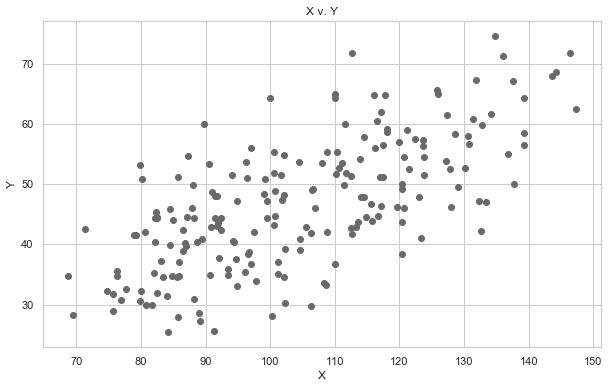

In [6]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "X"], data["Y"], marker="o", color="DimGray")
axes.set_title("X v. Y")
axes.set_xlabel( "X")
axes.set_ylabel( "Y")

plt.show()
plt.close()

When visualizing data it's important to be cognizant of two things: measurement artifacts and overstriking. Measurement artifacts arise when some variable is measured on a fixed scale or convention, for example, miles per gallon is almost always reported in integral values. What would it look like if $Y$ was measured on an integral scale?

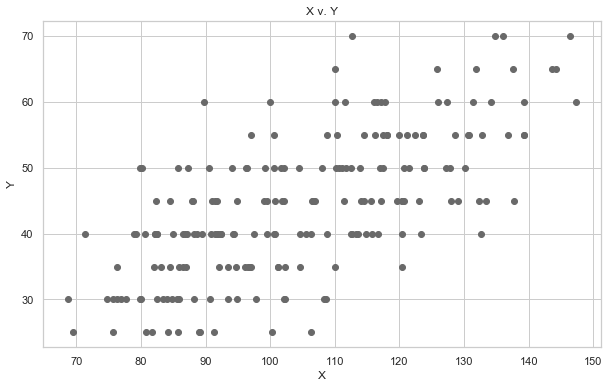

In [7]:
figure = plt.figure(figsize=(10, 6))

integral_y = data["Y"].apply(lambda x: np.floor(x/5) * 5)

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "X"], integral_y, marker="o", color="DimGray")
axes.set_title("X v. Y")
axes.set_xlabel( "X")
axes.set_ylabel( "Y")

plt.show()
plt.close()

For example, suppose $Y$ was measured in increments of 5 (5, 10, 15, 20). As we can see above, this creates a striating pattern that can dominate ability to find larger patterns in the data.

There is also overstriking when many observations have the same or similar values.

The solution to the first problem is to add a bit of "jitter" to the data to get rid of the striping effect--but not so much that we end up with false values. The solution to the second problem is to apply an alpha to the markers so that if there is overstriking, those points will be darker as more points are added.

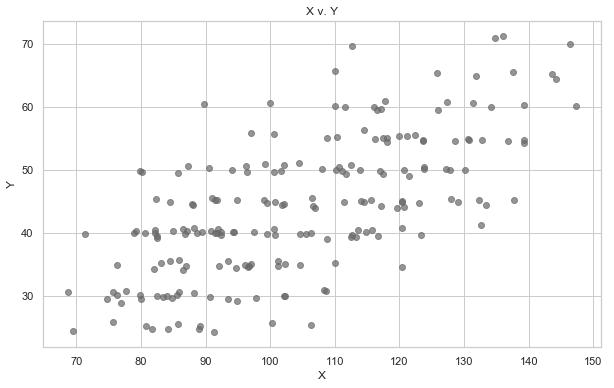

In [8]:
figure = plt.figure(figsize=(10, 6))

integral_y = data["Y"].apply(lambda x: np.floor(x/5) * 5)
jittered_y = integral_y + stats.norm.rvs( 0, 0.5, integral_y.size)

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data["X"], jittered_y, \
             marker="o", color="DimGray", alpha=0.7)

axes.set_title("X v. Y")
axes.set_xlabel("X")
axes.set_ylabel("Y")
plt.show()
plt.close()

Even with just some transparency added to the markers, we can start to see some kind of density arise in the plot. You can think of this as a third dimension to the data. The jitter also breaks up the striations a bit; this probably isn't enough jitter (it's normally distributed "noise" with mean = 0 and standard deviation 0.5). Because the distances between the bins is 5 units, we could probably use a jitter of 1-1.5. This would keep most points from "jumping" into another bin. I left the jitter small so you could see it being applied.


## Hexbinning

There may be cases where you have so much data that neither jitter nor transparency will help. In that case, you can use hexbinning. Hexbinning divides the XY-plane into hexagons of a specified size that are then used a bins in a 2d histogram (viewed from the top). A picture is worth a 1,000 words (in both senses).

Let's make some "big" data:

In [9]:
big_data = pd.DataFrame(np.concatenate([stats.norm.rvs( 90.0, 9.0, 10000), \
                                        stats.norm.rvs(120.0, 12.0, 10000)]))
big_data.columns = ["X"]
big_data["Y"] = big_data["X"].apply(lambda x: 5.0 + 0.4 * x \
                                    + stats.norm.rvs( 0.0, 8.0, 1)[0])
big_data.head()

,X,Y
0,87.654897,39.471960
1,93.637951,54.269687
2,82.395249,40.283018
3,82.380605,45.728767
4,89.368224,47.256485


And plot it the usual way:

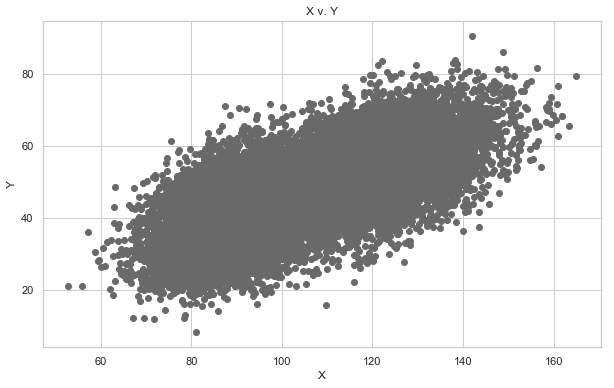

In [10]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(big_data[ "X"], big_data["Y"], marker="o", color="DimGray")
axes.set_title("X v. Y")
axes.set_xlabel( "X")
axes.set_ylabel( "Y")

plt.show()
plt.close()

Yikes. That's not helpful. Let's try hexbinning:

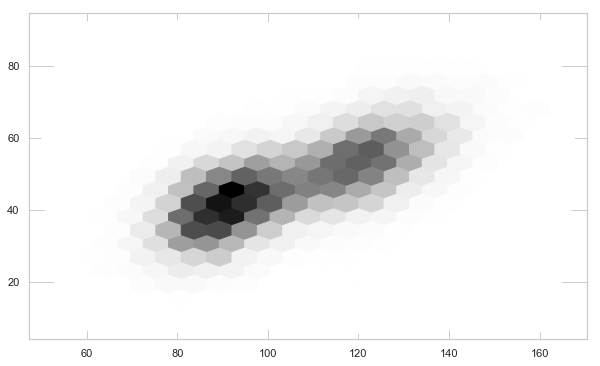

In [11]:
from matplotlib import cm

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hexbin(big_data["X"], big_data["Y"], gridsize=20, cmap=cm.Greys)

plt.show()
plt.close()

The hexbinning reveals a lot more structure to the data. And just like with other types of histograms, you may need to try different "grid" sizes. Another approach would be to *sample* your data.

## Trendlines

We may also want to add a trendline to our data based on the outcome of the Pearson or Spearman coefficient. At this stage we generally go for a non-parametric approach like LOESS (locally weighted regression). We'll have more to say about regression in later chapters.

`matplotlib` doesn't have Lowess out of the box, but we can use `statsmodels`:

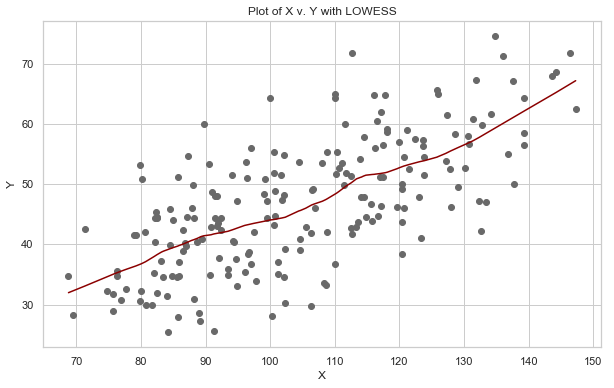

In [12]:
#https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess/37060980

import statsmodels.api as sm

lowess = sm.nonparametric.lowess(data["Y"], data["X"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "X"], data["Y"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of X v. Y with LOWESS")
axes.set_xlabel( "X")
axes.set_ylabel( "Y")

plt.show()
plt.close()

Comparing two and more numerical (and categorical) variables is at the heart of statistical model building so we will have a lot more to say about it in the chapters to come.